## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №1

Задание выполнила: _Вертеева Алена Сергеевна_

### Общая информация

__Дата выдачи:__ 30.01.2019

__Дедлайн:__ 23:59 10.02.2019

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib, а при желании сможете поучаствовать в настоящем соревновании по машинному обучению!

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}})\right) \times 10 / 21,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. Все баллы сверх обязательных (9 в первой части и 12 во второй) идут в бонус. Таким образом, за это домашнее задание можно получить 4 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-2: zCH4F32

## Часть 1. Numpy

In [431]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [432]:
def result_mark(weights, marks):
    a = np.round(np.sum(weights * marks))
    return a.astype(np.int, copy=False)

In [433]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)

8

### 2

Напишите функцию, меняющую все каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [434]:
def change_array(array, number):
    array[::3] = number
    return array

In [435]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
change_array(array, number)

array([-111,    5,    1, -111,   -3,   22, -111])

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [436]:
def find_close(array1, array2, precision):
    a = np.abs(array1-array2)
    return np.where(a < precision)[0]

In [437]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4, 3, 0, -1.2])
precision = 0.5
find_close(array1, array2, precision)

array([0, 1, 3, 6])

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [438]:
def block_matrix(block):
    a = np.concatenate((block, block)).transpose()
    b = np.concatenate((a, a))
    return b.transpose()

In [439]:
block = np.array([[0, 1, 2], [3, 4, 5]])
block_matrix(block)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

In [440]:
def diag_prod(matrix):
    a = np.diag(matrix)
    b = a[np.nonzero(a)]
    return b.prod()

In [441]:
matrix = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
diag_prod(matrix)

32

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [442]:
def normalize(matrix):
    a = np.mean(matrix, axis=0)   #массив средних знанчений по столбцам
    b = matrix - a                # матрица с вычтенным средним значением
    c = np.std(matrix, axis=0)    # массив стандартных отклонений по столбцам
    c[np.where(c == 0)] = 1       # чтобы не делить на 0, присвоим всем нулевым значениям 1
    d = np.divide(b, c)
    return d

In [443]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.70710678, -0.39223227,  0.46291005],
       [-1.41421356,  1.37281295,  0.9258201 ],
       [ 0.70710678, -0.98058068, -1.38873015]])

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите ваше любимое число). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [444]:
def antiderivative(coefs):
    a = np.size(coefs)
    b = np.arange(a,0,-1)
    c = np.append(coefs / b, [18])
    return c.astype(np.int, copy=False)

In [445]:
coefs = np.array([4, 6, 0, 1])
antiderivative(coefs)

array([ 1,  2,  0,  1, 18])

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [446]:
def make_symmetric(matrix):
    a = matrix + matrix.transpose()
    c = np.diag(a)
    a[np.diag_indices_from(a)] = c / 2
    return a

In [447]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
make_symmetric(matrix)

array([[ 1,  2,  3,  4],
       [ 2,  5,  6,  7],
       [ 3,  6,  8,  9],
       [ 4,  7,  9, 10]])

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [448]:
def construct_matrix(m, a, b):
    q = np.arange(a,b+1,1)
    w = np.full((m, b-a+1), q)
    return w

In [449]:
m = 5
a = 3
b = 10
construct_matrix(m, a, b)

array([[ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10]])

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [450]:
def cosine_similarity(vec1, vec2):
    a = np.dot(vec1, vec2)
    b = np.sqrt(np.sum(vec1 **2))
    c = np.sqrt(np.sum(vec2 **2))
    return a/(b*c)

In [451]:
vec1 = np.array([-2, 1, 0, -5, 4, 3, -3])
vec2 = np.array([0, 2, -2, 10, 6, 0, 0])
cosine_similarity(vec1, vec2)

-0.25

## Часть 2. Pandas и Matplotlib

In [452]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [453]:
data = pd.read_csv("train.csv")

In [454]:
data.shape

(891, 12)

In [455]:
data.head(5)   # то же самое, что и data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
data.tail()  # то же самое, что и data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

Выпишем все признаки и для каждого укажем его тип:
1) PassengerId - индекс пассарира - вещественный тип (так как представляется вещественным числом)
2) Survived - выжил ли пассажир - бинарный признак (принимает лишь 2 значения (0 - нет, 1 - да))
3) Pclass - номер класса, в котором ехал пассажир - вещественный тип (представлен вещественным числом)
4) Name - имя пассажира - категориальный признак (строки, которые нельзя упорядочить)
5) Sex - пол пассажира, в стоковом виде (male, female) - категориальный тип 
6) Age - возраст пассажира - вещественный тип (представлен вещественным числом)
7) SibSp - количество братьев и сестер или супругов на борту Титаника - вещественный тип (представлен вещественным числом)
8) Parch - количество родителей или детей на борту Титаника - вещественный тип (представлен вещественным числом)
9) Ticket - номер билета (не только цифры) - категориальный признак (строки, котые нельзя упорядочить)
10) Fare - пассажирский тариф (сколько заплатили за билет) - вещественный признак (представлен вещественным числом)
11) Cabin - номер каюты (не только цифры) - категориальный признак (строки, котые нельзя упорядочить)
12) Embarked - порт погрузки (где сел пассажир) - категориальный признак (пометки одного из трех классов 'S', 'C' или 'Q') - нельзя упорядочить

Теперь запишем три возможные задачи:
1) Задача регрессии: так как ответ на задачу регрессии - это вещественное число, то мы можем привести в пример задачи на предсказание возраста, количества братьев, сестер, супругов и детей на борту или пассажирский тариф. Мне более симпатичен пример с предсказанием номера класса, в котором ехал пассажир: пусть задача состоит в том, чтобы по данным заданным признакам (пол, возраст, выжил ли пассажир и так далее) предсказать, в каком классе ехал пассажир!
2) Задача классификации: ответом на задачи данного типа является метка определенного класса (классов должно быть обязательно ограниченное количество). В пример можно привести задачу на предсказанние, к какому классу принадлежал тот или иной пассажир Титаника. Или же пример, предсказать, в каком порту сел тот или иной пассажир.
3) Задача кластеризации: не известно, сколько должно быть классов, как проверить качество, ведь ответов нет (обучение без учителя). Это задачи на выявление групп похожих объектов. В качестве примера можно привести задачу на выявление схожих групп пассажиров среди пассажиров титаника (по полу, возрасту, классу и т.д.).

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [456]:
all = data['PassengerId'].count()
survived = data['Survived'].sum()
proportion_of_survive = survived / all
print(proportion_of_survive)

0.3838383838383838


In [457]:
survived_woman = data.loc[data['Sex'] == 'female', 'Survived'].sum()
print(survived_woman / survived)

0.6812865497076024


In [458]:
survived_man = data.loc[data['Sex'] == 'male', 'Survived'].sum()
print(survived_man / survived)

0.31871345029239767


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [459]:
a = data.groupby(['Pclass']).size().reset_index(name='quantity')
a

,Pclass,quantity
0,1,216
1,2,184
2,3,491


In [460]:
# как мы видим самый многолюдный класс - это класс № 3!
b = data.loc[data['Pclass'] == 3].groupby(['Sex']).size().reset_index(name='quantity')
b  # по табличке видим, что больше было мужчин

,Sex,quantity
0,female,144
1,male,347


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [162]:
data.head()  # просто посмотреть на наш датасет

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [461]:
q = data['Fare'].min()
w = data['Fare'].max()
e = data['Fare'].mean()
q, w, e

(0.0, 512.3292, 32.2042079685746)

In [462]:
a = data.loc[data['Embarked'] == 'S']
q = a['Fare'].min()
w = a['Fare'].max()
e = a['Fare'].mean()
q, w, e

(0.0, 263.0, 27.07981180124218)

(если правильно поняла формулировку) Внизу приведены три гистограммы для каждого порта посадки (распределение цен билетов по количеству людей):

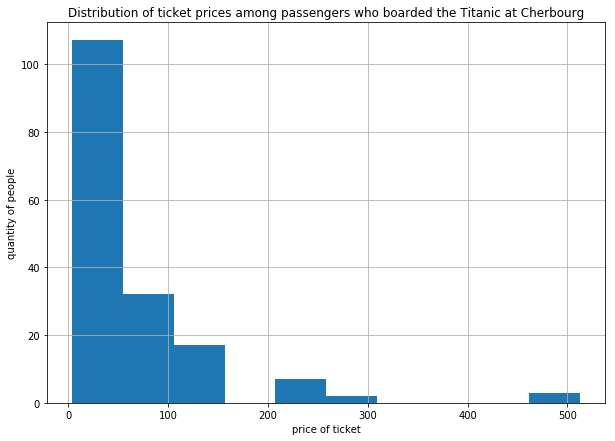

In [463]:
plt.figure(figsize=(10,7))
a = data.loc[data['Embarked'] == 'C']
plt.title('Distribution of ticket prices among passengers who boarded the Titanic at Cherbourg')
a['Fare'].hist()
plt.xlabel('price of ticket')
plt.ylabel('quantity of people')
plt.show()

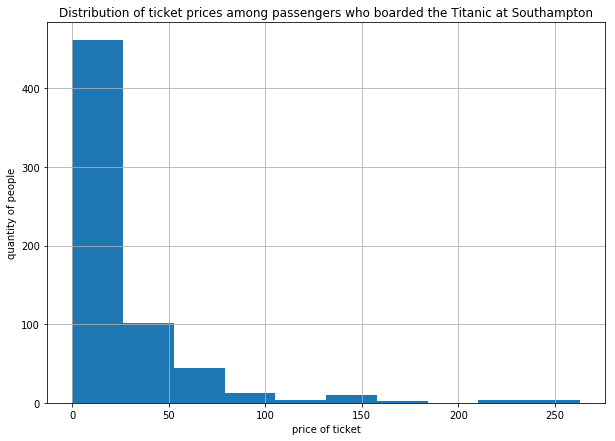

In [464]:
plt.figure(figsize=(10,7))
a = data.loc[data['Embarked'] == 'S']
plt.title('Distribution of ticket prices among passengers who boarded the Titanic at Southampton')
a['Fare'].hist()
plt.xlabel('price of ticket')
plt.ylabel('quantity of people')
plt.show()

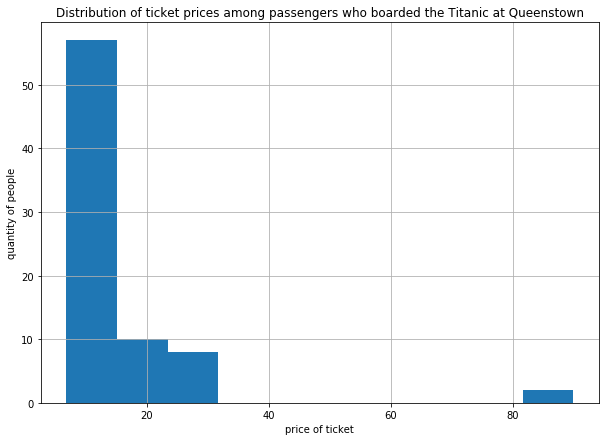

In [465]:
plt.figure(figsize=(10,7))
a = data.loc[data['Embarked'] == 'Q']
plt.title('Distribution of ticket prices among passengers who boarded the Titanic at Queenstown')
a['Fare'].hist()
plt.xlabel('price of ticket')
plt.ylabel('quantity of people')
plt.show()

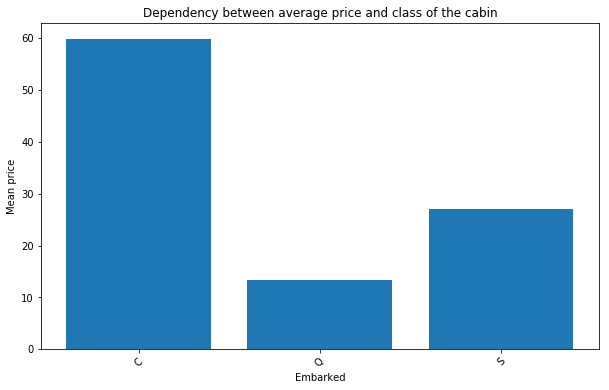

In [468]:
df_grouped = data.groupby('Embarked')['Fare'].mean()
plt.figure(figsize=(10, 6))
plt.bar(df_grouped.index, df_grouped.values)
#  Если мы знаем последовательность, в которой идут данные, то можно написать так:
#  plt.bar(df_grouped.index, df_grouped.values, tick_label=['Cherbourg', 'Queenstown', 'Southampton'])
plt.xticks(rotation=45)
plt.title('Dependency between average price and class of the cabin') 
plt.xlabel('Embarked') 
plt.ylabel('Mean price') 
plt.show() 

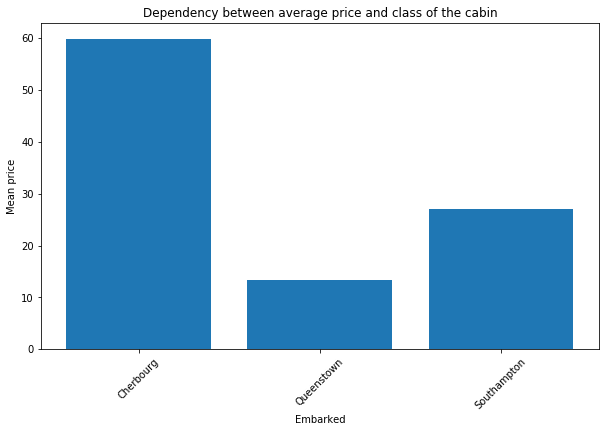

In [469]:
df_grouped = data.groupby('Embarked')['Fare'].mean()
plt.figure(figsize=(10, 6))
plt.bar(df_grouped.index, df_grouped.values, tick_label=['Cherbourg', 'Queenstown', 'Southampton'])
plt.xticks(rotation=45) 
plt.title('Dependency between average price and class of the cabin') #запишем название графика
plt.xlabel('Embarked') 
plt.ylabel('Mean price') 
plt.show() 

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [470]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


С одной стороны, никакая информация не может быть лишней. Но с другой, для нас, как для аналитиков, все зависит от той задачи, которая перед нами стоит. Некоторые признаки для решения определенных задач просто не нужны или не несут в себе достаточного или важного количества информации. Так, например из нашего датасета вполне безболезненно можно удалить PassengerId, Name, Ticket, SibSp, Cabin и Parch. (оставим поле Name для задания 22)

In [515]:
# для корректировки и проверки заданий выше не будем менять исходный датасет
# передадим нужные нам столбцы в новый датасет
df = data[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked']]
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


In [472]:
# Если же задание заключается именно в умении удалять столбцы без дублирования и создания новых датасетов
# то ниже приведен код для выполнения этих задач))
# точно так же можно поступить с любым другим столбцом
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [516]:
# узнаем есть ли пропуски в получившихся данных
df.isnull().any().any()  # видим, что пропуски есть

True

In [517]:
# посмотрим в каких столбцах есть пропуски
df.isnull().sum()  # как мы видим, пропуски есть только в столбцах Age (177 штук) и Embarked (2 штуки)(и видим сколько их)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

Пропуски в возрасте имеет смысл заменить средним возрастом среди пассажиров. А вот пропуски в столбце, отвечающем за порт, в котором сел пассажир, невозможно заменить на среднее значение. Обратимся к заданию 15 (из графиков видим, что больше всего людей село в Саутгемптоне) и заполним пропуски значением 'S' (хотя их всего только 2, поэтому эти строки можно было бы просто удалить, но пощадим их на этот раз)

In [518]:
a = df['Age'].mean()
a

29.69911764705882

In [519]:
df[['Age']]=df[['Age']].apply(lambda x: x.fillna(a),axis=0)

In [520]:
df[['Embarked']]=df[['Embarked']].apply(lambda x: x.fillna('S'),axis=0)

In [521]:
df.isnull().any().any()

False

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

Все зависит от того, какой метод для корреляции мы выберем (я рассмотрю все три случая)

In [483]:
df2 = df[['Age', 'Fare']]
df2.corr(method='spearman')

,Age,Fare
Age,1.000000,0.118847
Fare,0.118847,1.000000


In [484]:
df2.corr(method='pearson')

,Age,Fare
Age,1.000000,0.091566
Fare,0.091566,1.000000


In [485]:
df2.corr(method='kendall')

,Age,Fare
Age,1.000000,0.080726
Fare,0.080726,1.000000


In [75]:
df2 = df[['Age', 'Fare']]
df2['Age'].corr(df2['Fare'])

0.09156609328505758

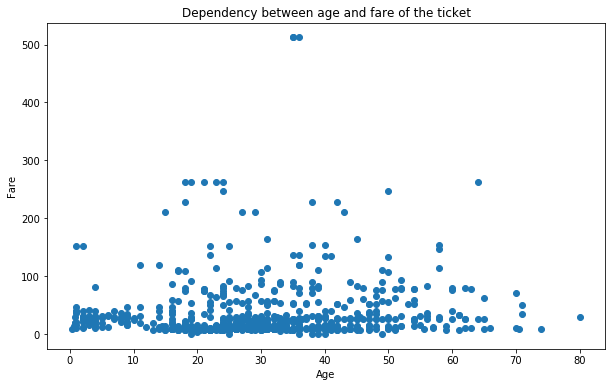

In [486]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Fare'])
plt.title('Dependency between age and fare of the ticket') 
plt.xlabel('Age') 
plt.ylabel('Fare') 
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

Найдем среднюю стоимость билетов выживших и погибших пассажиров:

In [487]:
df.groupby(['Survived'])['Fare'].mean().reset_index(name='average ticket price')

,Survived,average ticket price
0,0,22.117887
1,1,48.395408


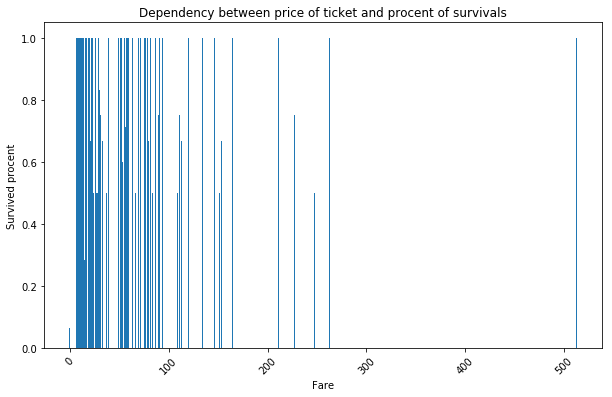

In [492]:
# покажем на графике зависимость между ценой билета и процентом выживаемости
df_grouped = data.groupby('Fare')['Survived'].mean()
plt.figure(figsize=(10, 6))
plt.bar(df_grouped.index, df_grouped.values)
plt.xticks(rotation=45)
plt.title('Dependency between price of ticket and procent of survivals')
plt.xlabel('Fare') 
plt.ylabel('Survived procent')
plt.show() 
# как мы видим из графика, процент выживших, кто заплатил меньшую сумму - больше

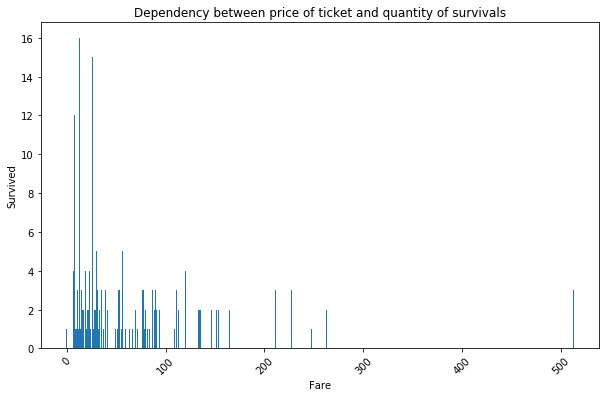

In [493]:
# покажем на графике зависимость между ценой билета и выживаемостью (количеством выживших)
df_grouped = data.groupby('Fare')['Survived'].sum()
plt.figure(figsize=(10, 6))
plt.bar(df_grouped.index, df_grouped.values)
plt.xticks(rotation=45)
plt.title('Dependency between price of ticket and quantity of survivals')
plt.xlabel('Fare')
plt.ylabel('Survived') 
plt.show() 
# как мы видим из графика, данное нам утверждение неверно (чаще выживали люди с более дешевыми билетами)

In [489]:
df.groupby(['Pclass'])['Survived'].sum().reset_index(name='quantity of survived people')
# как мы видим, больше всего людей выжило в первом классе

,Pclass,quantity of survived people
0,1,136
1,2,87
2,3,119


In [490]:
df.groupby(['Pclass'])['Survived'].mean().reset_index(name='percentage of survived people')
# теперь мы видим процент выживаемости в каждом классе

,Pclass,percentage of survived people
0,1,0.629630
1,2,0.472826
2,3,0.242363


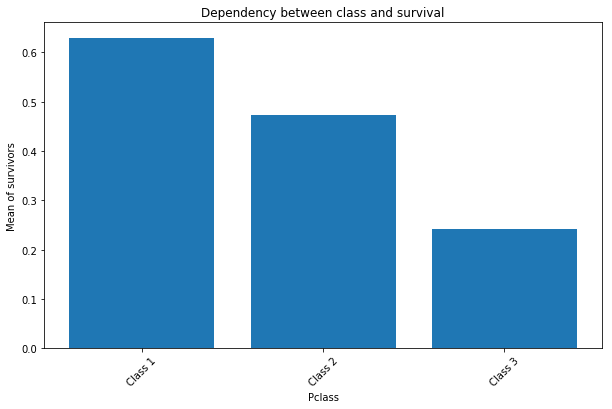

In [491]:
df_grouped = data.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(10, 6))
plt.bar(df_grouped.index, df_grouped.values, tick_label=['Class 1', 'Class 2', 'Class 3'])
plt.xticks(rotation=45) #делаем подписи по оси x вертикальными
plt.title('Dependency between class and procent of survivals') #запишем название графика
plt.xlabel('Pclass') #назовем ось x
plt.ylabel('Mean of survivors') #назовем ось y
plt.show() 
# как мы видим из графика, процент выживания в первом (примерно 0.62) классе выше, чем во втором (чуть меньше 0.5)
# и самый минимальный процент выживания в третьем классе (около 0.25)

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [522]:
# создадим столбец Родственники (количество родственников, плывших вместе с пассажиром, включая его самого)
df['Relatives'] = data['SibSp'] + data['Parch'] + 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [523]:
# создадим столбец Фамилия
df['Surname'] = df['Name'].apply(lambda x: x.split(',')[0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [524]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Relatives,Surname
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Heikkinen
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Futrelle
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Allen


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [497]:
# например, найдем сколько человек с определенной фамилией были на борту (выводим начиная с четырех выживших одной фамилии)
df_sur = df.groupby('Surname')['Survived'].aggregate(
    lambda x: x.shape[0])
df_sur.loc[df_sur > 3]

Surname
Andersson     9
Asplund       4
Baclini       4
Brown         4
Carter        6
Ford          4
Fortune       4
Goodwin       6
Gustafsson    4
Harper        4
Harris        4
Hart          4
Johnson       6
Kelly         4
Lefebre       4
Palsson       4
Panula        6
Rice          5
Sage          7
Skoog         6
Smith         4
Williams      4
Name: Survived, dtype: int64

In [498]:
# найдем какова была вероятность выжить мужчине и женщине в зависимоти от класса
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

Построить можно распределение только вещественных признаков, а значит мы можем посторить гистогаммы для: PassengerId (что по факту не имеет никакого смысла), Survived (бинарный признак, но тем не менее), Pclass, Age, SibSp, Parch, Relatives и Fare. Построим их ниже

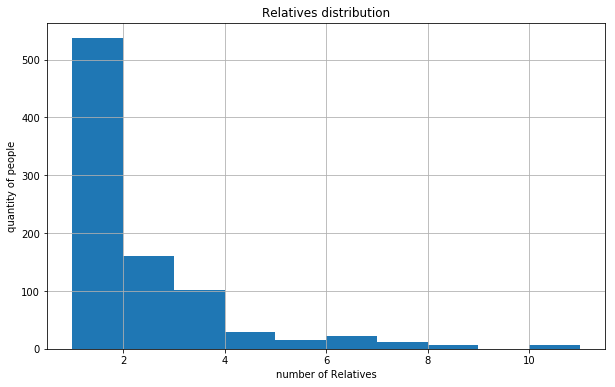

In [499]:
plt.figure(figsize=(10,6))
plt.title('Relatives distribution')
df['Relatives'].hist()
plt.xlabel('number of Relatives')
plt.ylabel('quantity of people')
plt.show()

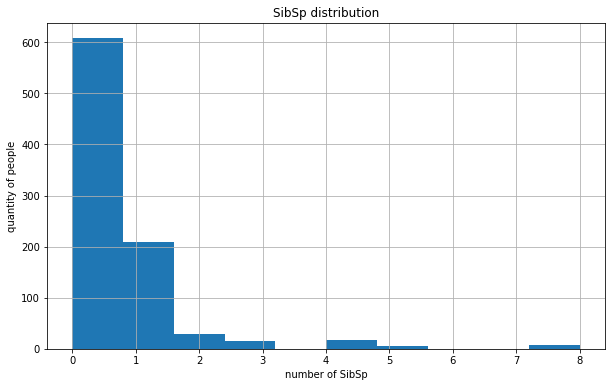

In [500]:
plt.figure(figsize=(10,6))
plt.title('SibSp distribution')
data['SibSp'].hist()
plt.xlabel('number of SibSp')
plt.ylabel('quantity of people')
plt.show()

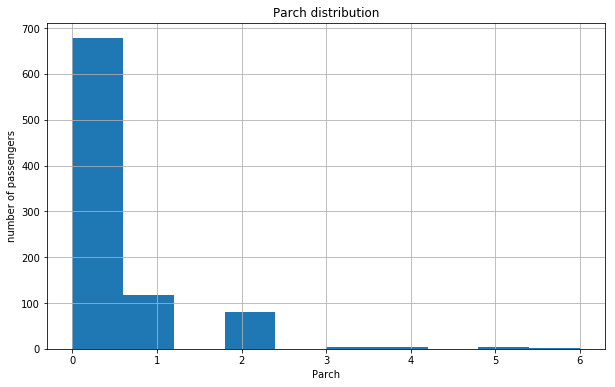

In [501]:
plt.figure(figsize=(10,6))
plt.title('Parch distribution')
data['Parch'].hist()
plt.xlabel('Parch')
plt.ylabel('number of passengers')
plt.show()

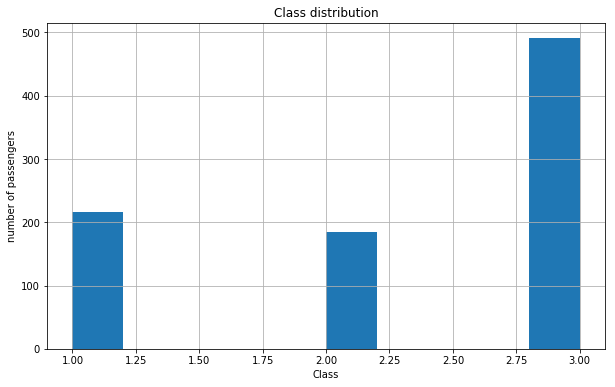

In [502]:
plt.figure(figsize=(10,6))
plt.title('Class distribution')
df['Pclass'].hist()
plt.xlabel('Class')
plt.ylabel('number of passengers')
plt.show()

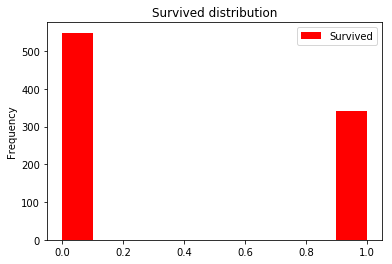

In [503]:
# можно выводить гистограммы и другим способом:
df.plot(y='Survived', kind='hist', 
           color='red',  title='Survived distribution')

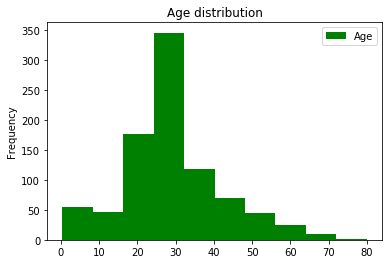

In [504]:
df.plot(y='Age', kind='hist', 
           color='green',  title='Age distribution')

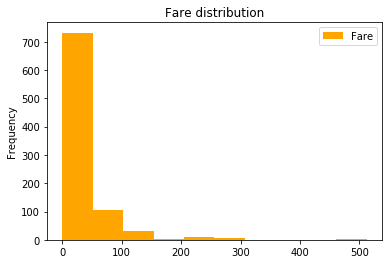

In [505]:
df.plot(y='Fare', kind='hist', 
           color='orange',  title='Fare distribution')

Как мы видим все вещественные признаки изменяются в совершенно разных диапазонах, например класс от 1 до 3, цена билета от 0 до более 700, а возраст от 0 до 80. Работать с такими данными не очень удобно, так как менее важные признаки в силу большого разброса данных могут вносить значительные изменения, хотя являются незначительными. Именно поэтому признаки стоит нормировать! (не будем нормализовать ID и Survived)

In [525]:
df['Fare'] = (df['Fare'] - df['Fare'].mean()) / (df['Fare'].max() - df['Fare'].min())
df['Age'] = (df['Age'] - df['Age'].mean()) / (df['Age'].max() - df['Age'].min())
df['Relatives'] = (df['Relatives'] - df['Relatives'].mean()) / (df['Relatives'].max() - df['Relatives'].min())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

Посмотрим как изменилась ситуация (хотя это видно и в таблице):

In [526]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Relatives,Surname
0,0,3,"Braund, Mr. Owen Harris",male,-0.096747,-0.048707,S,0.00954,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.104309,0.076277,C,0.00954,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,-0.046483,-0.047390,S,-0.09046,Heikkinen
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.066611,0.040786,S,0.00954,Futrelle
4,0,3,"Allen, Mr. William Henry",male,0.066611,-0.047146,S,-0.09046,Allen


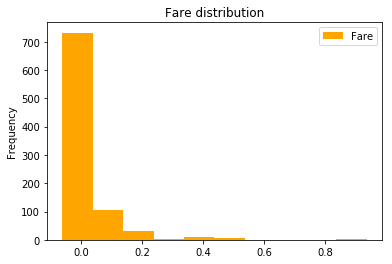

In [508]:
df.plot(y='Fare', kind='hist', 
           color='orange',  title='Fare distribution')

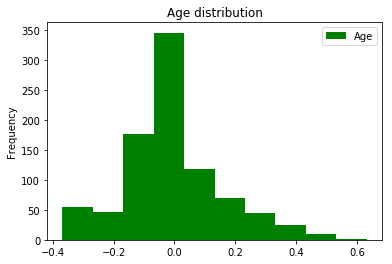

In [509]:
df.plot(y='Age', kind='hist', 
           color='green',  title='Age distribution')

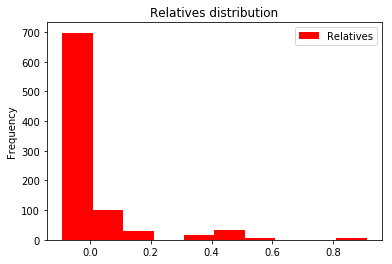

In [510]:
df.plot(y='Relatives', kind='hist', 
           color='red',  title='Relatives distribution')

Как мы видим, значения по оси X изменились и теперь находятся в примерно одинаковых пределах (-1, 1)

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

Кодировать категориальные признаки будем для датасета df (с нормализованными Age, Fare, Relatives) с убранными ненужными полями. А значит, из категориальных признаков остаются Embarked, Sex, Name и Surname

In [527]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Relatives,Surname
0,0,3,"Braund, Mr. Owen Harris",male,-0.096747,-0.048707,S,0.00954,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.104309,0.076277,C,0.00954,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,-0.046483,-0.047390,S,-0.09046,Heikkinen
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.066611,0.040786,S,0.00954,Futrelle
4,0,3,"Allen, Mr. William Henry",male,0.066611,-0.047146,S,-0.09046,Allen


In [528]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})  

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [529]:
# поле с именем можно просто удалить, так как Имя не имеет значения для выживания ( зато оставим фамилию)
df.drop('Name', axis=1, inplace=True)

In [530]:
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 0, 'Q': 2})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [531]:
# теперь закодируем фамилии
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Surname'])
df['Surname'] = le.transform(df['Surname']) 
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Surname
0,0,3,0,-0.096747,-0.048707,1,0.00954,73
1,1,1,1,0.104309,0.076277,0,0.00954,136
2,1,3,1,-0.046483,-0.047390,1,-0.09046,251
3,1,1,1,0.066611,0.040786,1,0.00954,198
4,0,3,0,0.066611,-0.047146,1,-0.09046,11


In [532]:
# теперь нормализуем поле Surname
df['Surname'] = (df['Surname'] - df['Surname'].mean()) / (df['Surname'].max() - df['Surname'].min())
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Surname
0,0,3,0,-0.096747,-0.048707,1,0.00954,-0.379915
1,1,1,1,0.104309,0.076277,0,0.00954,-0.285321
2,1,3,1,-0.046483,-0.047390,1,-0.09046,-0.112648
3,1,1,1,0.066611,0.040786,1,0.00954,-0.192228
4,0,3,0,0.066611,-0.047146,1,-0.09046,-0.473008


In [533]:
# нормализуем Embarked и Pclass
df['Embarked'] = (df['Embarked'] - df['Embarked'].mean()) / (df['Embarked'].max() - df['Embarked'].min())
df['Pclass'] = (df['Pclass'] - df['Pclass'].mean()) / (df['Pclass'].max() - df['Pclass'].min())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [534]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Surname
0,0,0.345679,0,-0.096747,-0.048707,0.051066,0.00954,-0.379915
1,1,-0.654321,1,0.104309,0.076277,-0.448934,0.00954,-0.285321
2,1,0.345679,1,-0.046483,-0.047390,0.051066,-0.09046,-0.112648
3,1,-0.654321,1,0.066611,0.040786,0.051066,0.00954,-0.192228
4,0,0.345679,0,0.066611,-0.047146,0.051066,-0.09046,-0.473008


# 3 Sklearn + Kaggle (бонусная часть)

### 25

Решите задачу бинарной классификации по предсказанию выживаемости пассажира. Для этого отделите от обучающей выборки целевую переменную `'Survived'` и обучите на них какой-нибудь алгоритм машинного обучения для классификации (например, kNN). С помощью него постройте предсказание на тестовой выборке, предварительно обработав ее аналогичным образом, что и обучающую. 

In [535]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [536]:
X_test = df.drop('Survived', axis=1)
y_test = df['Survived']

In [537]:
knn = KNeighborsClassifier()
knn.fit(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [538]:
knn.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [539]:
accuracy_score(y_test, knn.predict(X_test))

0.8518518518518519

А теперь проверим точность полученного алгиритна на новых даннных, так как проверять корректность алгоритма, который обучался на этой самой выборке, некорректно!

In [540]:
dt = pd.read_csv("test.csv")
dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Нам придется проделать нормализацию, кодирование категориальных признаков и удаление ненужных (чтобы обученный нами алгоритм смог работать с новыми данными).

In [541]:
dt.drop('PassengerId', axis=1, inplace=True)
dt.drop('Cabin', axis=1, inplace=True)
dt.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [542]:
dt.isnull().sum()   # видим, что есть пропуски в Fare и Age

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [543]:
a = dt['Age'].mean()
b = dt['Fare'].mean()
dt[['Age']]=df[['Age']].apply(lambda x: x.fillna(a),axis=0)
dt[['Fare']]=df[['Fare']].apply(lambda x: x.fillna(b),axis=0)

In [544]:
dt.isnull().sum()  # как мы видим пропусков данных больше нет

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [545]:
dt['Relatives'] = dt['SibSp'] + dt['Parch'] + 1

In [546]:
dt['Surname'] = dt['Name'].apply(lambda x: x.split(',')[0])

In [547]:
dt['Fare'] = (dt['Fare'] - dt['Fare'].mean()) / (dt['Fare'].max() - dt['Fare'].min())
dt['Age'] = (dt['Age'] - dt['Age'].mean()) / (dt['Age'].max() - dt['Age'].min())
dt['Relatives'] = (dt['Relatives'] - dt['Relatives'].mean()) / (dt['Relatives'].max() - dt['Relatives'].min())

In [548]:
dt['Sex'] = dt['Sex'].map({'female': 1, 'male': 0})

In [549]:
dt.drop('Name', axis=1, inplace=True)

In [550]:
dt['Embarked'] = dt['Embarked'].map({'S': 1, 'C': 0, 'Q': 2})

In [551]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dt['Surname'])
dt['Surname'] = le.transform(dt['Surname']) 

In [552]:
dt['Surname'] = (dt['Surname'] - dt['Surname'].mean()) / (dt['Surname'].max() - dt['Surname'].min())

In [553]:
dt.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,Surname
0,3,0,-0.098080,0,0,330911,-0.049327,2,-0.083971,-0.015342
1,3,1,0.129938,1,0,363272,0.075658,1,0.016029,0.460441
2,2,0,-0.041075,0,0,240276,-0.048009,2,-0.083971,0.152749
3,3,0,0.087185,0,0,315154,0.040166,1,-0.083971,0.474686
4,3,1,0.087185,1,1,3101298,-0.047765,1,0.116029,-0.078020


In [554]:
dt.drop('SibSp', axis=1, inplace=True)
dt.drop('Parch', axis=1, inplace=True)
dt.drop('Ticket', axis=1, inplace=True)

In [555]:
dt['Embarked'] = (dt['Embarked'] - dt['Embarked'].mean()) / (dt['Embarked'].max() - dt['Embarked'].min())
dt['Pclass'] = (dt['Pclass'] - dt['Pclass'].mean()) / (dt['Pclass'].max() - dt['Pclass'].min())

In [556]:
X_check = dt

In [557]:
y_predicted = knn.predict(X_check)
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

На основе данных, с которыми вы работали, было сделано соревнование на Kaggle, ориентированное на начинающих Data Scientists: https://www.kaggle.com/c/titanic. Вам предлагается в нем поучаствовать — если вы дошли до этого момента, то для этого осталось совсем ничего. Зарегистрируйтесь на Kaggle и примите правила соревнования. Если у вас уже есть ответ для тестовой выборки, который вы хотите отправить для оценивания и попасть в лидерборд, его нужно добавить в .csv файл и оформить нужным образом. Для этого во вкладке с данными (https://www.kaggle.com/c/titanic/data) есть пример того, как должен выглядеть этот файл ("gender_submission.csv"). Вы можете скачать и изучить его. Для вашего удобства ниже приведен код, который позволяет сформировать файл для отправки.

In [429]:
subm = pd.read_csv('gender_submission.csv')
subm['Survived'] = y_predicted

In [430]:
subm.to_csv('test_subm_proba.csv', index=False)

Отправьте файл на оценивание с помощью кнопки "Submit Predictions". Метрика, используемая в соревновании — accuracy. Какой получился результат? Попробуйте его улучшить! Например, попробуйте выбрать признаки, которые были бы наиболее полезны для предсказания (feature selection) или создайте новые признаки (feature generation). Вы можете найти очень много полезной информации в https://www.kaggle.com/c/titanic/kernels и https://www.kaggle.com/c/titanic/discussion.

Бейзлайн семинариста: 0.67942

Ваш лучший результат: 0.75598 (Сама удивлена!) 

Повысить данный резельтат можно добавив в расчет фамилии, так одна семья могла содержать много женщин и детей, а значит их вероятность выжить больше (эта часть уже добавлена в код выше), взять в расчет место, где сели пассажиры (добавлено). Остальные параметры не кажутся мне существенными для предсказания выживаемости.